# Notebook to explain how to use Win Probability

We will first import the py_ball library, which contains the winprobability submodule
I added a constants submodule, which contains the headers.
The other two packages are just for evaluation of the model

In [13]:
%matplotlib inline
from py_ball import winprobability, constants
import time
import statistics

## Win Probability Object
Now, we generate a win probability object, which contains methods that we can use to manipulate and plot the win probability data

It takes in the game_id for the stats.nba.com API and the headers (from the constants submodule)

In [17]:
wp = winprobability.WinProbability(game_id="0021900001", headers=constants.headers)

## Using the probabilities
The method we will use is the WinProbability.probs() method. It has multiple inputs:

plot_home=True, whether the model plots the home win probability throughout the game
plot_away=False, whether the model plots the away win probability throughout the game
plot_diff=False, whether or not to plot the point differential side by side with the win probability
get_values=False, whether to return 4 values in addition (or not) to making the plots. It will return (in the following order:

1) Timestamps
2) Home win probability every 3 second interval in the game
3) Away win probability every 3 second interval in the game
4) The home team abbreviation
5) The away team abbreviation

Below are some examples

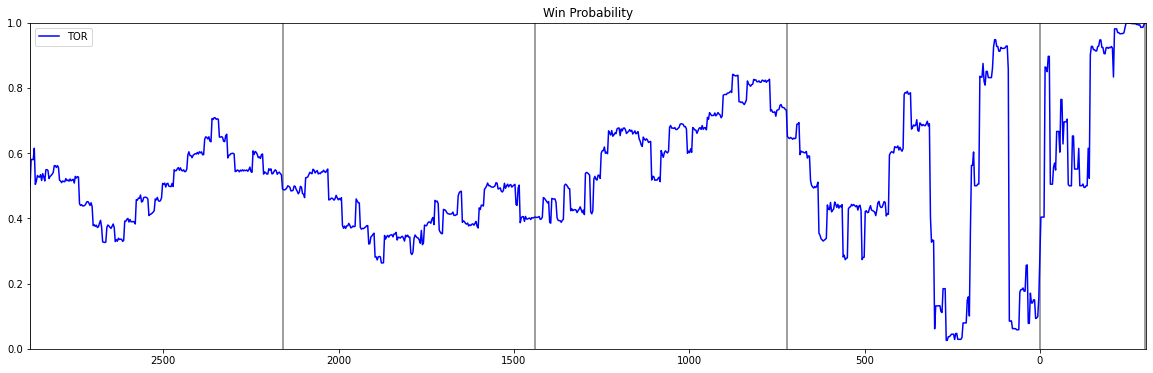

In [18]:
wp.probs()

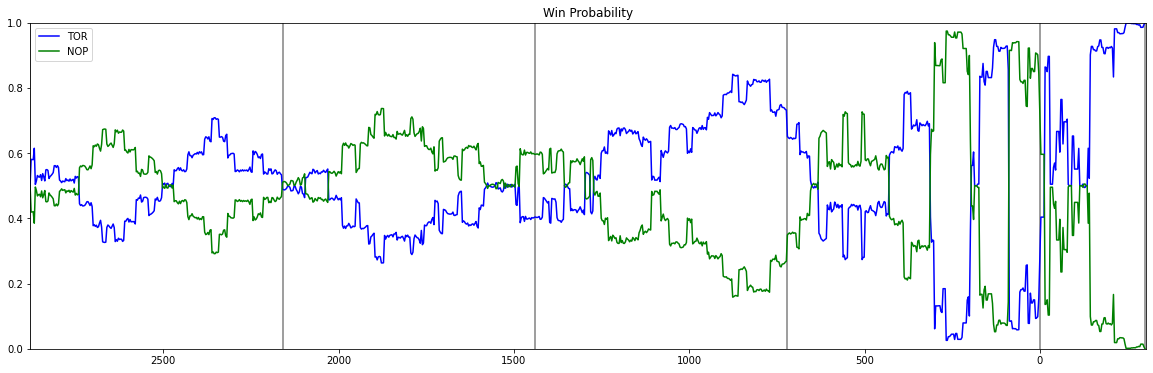

In [19]:
wp.probs(plot_home=True, plot_away=True)

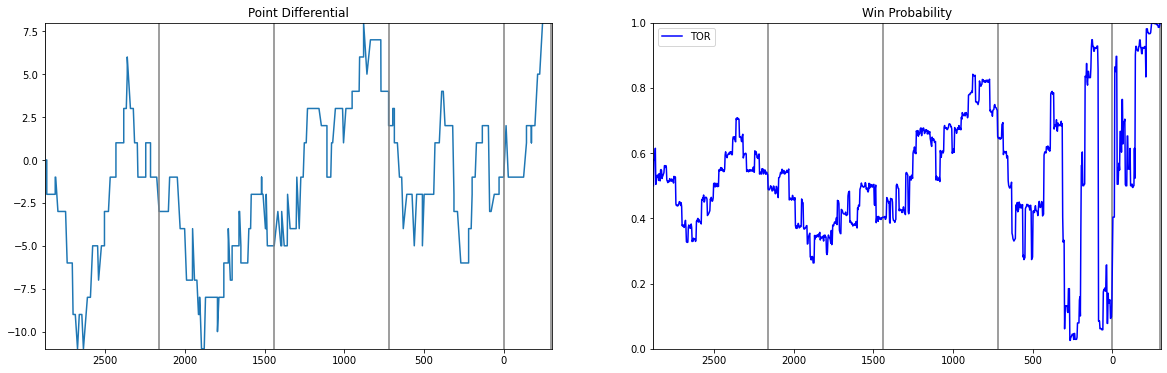

In [20]:
wp.probs(plot_diff=True)

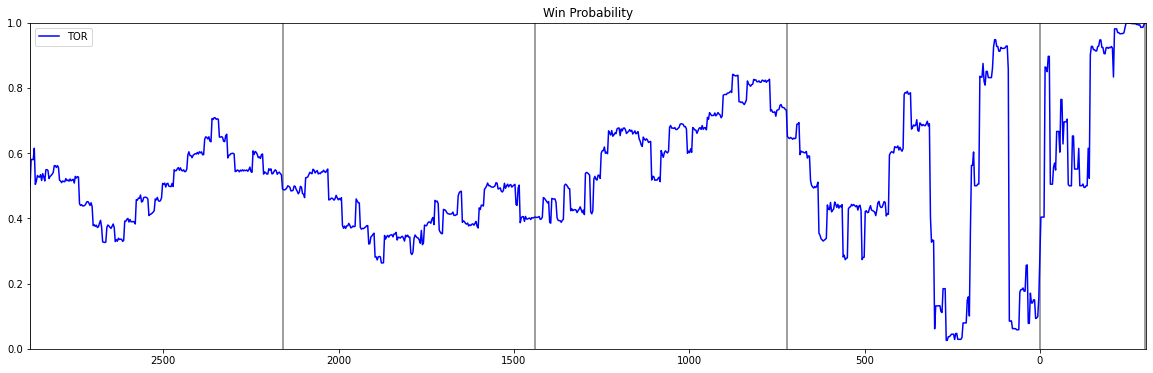

In [21]:
times, home_p, away_p, home_abr, away_abr = wp.probs(plot_home=True, get_values=True)

In [22]:
times[0], home_p[0], away_p[0]

(2880, 0.5, 0.5)

## Model Accuracy
To evaluate model accuracy, we implement a brier score which is essentially the summation of all of the square differences between the actual and predicted probability. You can read more about brier scores here https://en.wikipedia.org/wiki/Brier_score

You can easily check the brier score for an individual game like so:

In [24]:
wp.brier_score()

0.2593129494312705

In [3]:
"""
Given the total number of games in a season, we generate the game_ids
"""
def get_game_ids(years, total_games_per_year=1230):
    game_ids = []
    for year in years:
        for game in range(1, total_games_per_year+1):
            maybe = '002%s' + str(game).zfill(5)
            game_ids.append(maybe % year)
    return game_ids

In [3]:
inpredictible = get_game_ids(['18'])

In [4]:
scores = []

In [11]:
for game_id in inpredictible:
    print(game_id)
    wp = winprobability.WinProbability(game_id=game_id, headers=constants.headers)
    #phome, paway, home, away = wp.plot_probs_for_test(plot_wp=True)
    brier_score = wp.brier_score()
    scores.append(brier_score)
    time.sleep(3.0)

0021800001
0021800002
0021800003
0021800004
0021800005
0021800006
0021800007
0021800008
0021800009
0021800010
0021800011
0021800012
0021800013
0021800014
0021800015
0021800016
0021800017
0021800018
0021800019
0021800020
0021800021
0021800022
0021800023
0021800024
0021800025
0021800026
0021800027
0021800028
0021800029
0021800030
0021800031
0021800032
0021800033
0021800034
0021800035
0021800036
0021800037
0021800038
0021800039
0021800040
0021800041
0021800042
0021800043
0021800044
0021800045
0021800046
0021800047
0021800048
0021800049
0021800050
0021800051
0021800052
0021800053
0021800054
0021800055
0021800056
0021800057
0021800058
0021800059
0021800060
0021800061
0021800062
0021800063
0021800064
0021800065
0021800066
0021800067
0021800068
0021800069
0021800070
0021800071
0021800072
0021800073
0021800074
0021800075
0021800076
0021800077
0021800078
0021800079
0021800080
0021800081
0021800082
0021800083
0021800084
0021800085
0021800086
0021800087
0021800088
0021800089
0021800090
0021800091

0021800746
0021800747
0021800748
0021800749
0021800750
0021800751
0021800752
0021800753
0021800754
0021800755
0021800756
0021800757
0021800758
0021800759
0021800760
0021800761
0021800762
0021800763
0021800764
0021800765
0021800766
0021800767
0021800768
0021800769
0021800770
0021800771
0021800772
0021800773
0021800774
0021800775
0021800776
0021800777
0021800778
0021800779
0021800780
0021800781
0021800782
0021800783
0021800784
0021800785
0021800786
0021800787
0021800788
0021800789
0021800790
0021800791
0021800792
0021800793
0021800794
0021800795
0021800796
0021800797
0021800798
0021800799
0021800800
0021800801
0021800802
0021800803
0021800804
0021800805
0021800806
0021800807
0021800808
0021800809
0021800810
0021800811
0021800812
0021800813
0021800814
0021800815
0021800816
0021800817
0021800818
0021800819
0021800820
0021800821
0021800822
0021800823
0021800824
0021800825
0021800826
0021800827
0021800828
0021800829
0021800830
0021800831
0021800832
0021800833
0021800834
0021800835
0021800836

In [12]:
statistics.mean(scores)

0.16910979338644194

In [ ]:
wp = winprobability.WinProbability(game_id="0021800001", headers=constants.headers)